## task 1b

write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the spam_dataset.csv to test it out. 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sample data dictionary based on the dataset provided
data = {
    'win': [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    'click': [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    'team': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1],
    'claim': [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
    'reminder': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    'Category': ['Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham']
}

# Converting the dictionary to a dataframe
df = pd.DataFrame(data)

# Step 1: Prepare data
X = df[['win', 'click', 'team', 'claim', 'reminder']]
y = df['Category']

# Step 2: Split data (here using full dataset for both training and testing as per problem setup)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Step 4: Build KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Step 5: Output the accuracy scores and predictions for both models
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

(nb_predictions, knn_predictions, nb_accuracy, knn_accuracy)

(array(['Ham', 'Spam', 'Spam'], dtype='<U4'),
 array(['Ham', 'Spam', 'Ham'], dtype=object),
 1.0,
 0.6666666666666666)

## task 2b

2b. Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the spam_dataset.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth) 


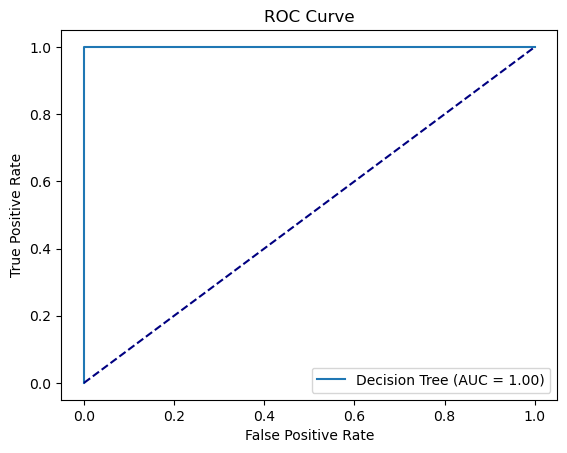

1.0

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt


# Using the same dataset and train-test split from previous example
# Load data into X and y
X = df[['win', 'click', 'team', 'claim', 'reminder']]
y = df['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Fit a Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=3)  # Reduced max_depth
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Step 2: Compute predicted probabilities for ROC curve
dt_probabilities = dt_model.predict_proba(X_test)[:, 1]  # Probability of class 'Spam'

# Binarize the output for calculating ROC and AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Step 3: Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_binarized, dt_probabilities)
auc_score = roc_auc_score(y_test_binarized, dt_probabilities)

# Step 4: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

auc_score